<a href="https://colab.research.google.com/github/KayalvizhiT513/MobileNet-FeatureExtraction-HumanDetection/blob/main/Training_Mobile_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing library to handle time
import time

# importing libray to handle status bars
from tqdm.notebook import tqdm

# import libray to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# importing library to deal with numeric arrays
import numpy as np

# importing library to process images
import cv2

# importing deep learning library
import tensorflow as tf

# importing library for preprocessing
from sklearn.preprocessing import LabelEncoder

# importing library for plotting
import matplotlib.pyplot as plt

In [2]:
# defining a function to resize images
def img_prep(features, output, dims):

    img_data = []
    labels = []

    for enum, imagePath in tqdm(enumerate(features)):

        try:
            counter = 0
            img=cv2.imread(imagePath)
            img=cv2.resize(img, (dims[1], dims[0]))

        except Exception as e:

            counter = 1

        if counter==0:

            label = output[enum]
            labels.append(label)

            img_data.append(img)

    return img_data, labels

In [3]:
import glob

folder_path = "/content/drive/MyDrive/NegativeSamples1000"
neg_patch = glob.glob(folder_path + "/*.[jpJP]*g")  # Matches .jpg, .jpeg, .png

print(neg_patch)


['/content/drive/MyDrive/NegativeSamples1000/tile_473_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_473_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_474_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_475_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_475_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_476_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_479_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_479_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_480_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_480_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_482_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_482_2.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_482_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_483_1.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_483_3.jpg', '/content/drive/MyDrive/NegativeSamples1000/tile_484_1.jpg', '/content/drive/MyDrive

In [4]:
!git clone https://github.com/KayalvizhiT513/MobileNet-FeatureExtraction-HumanDetection.git


Cloning into 'MobileNet-FeatureExtraction-HumanDetection'...
remote: Enumerating objects: 689, done.
remote: Counting objects: 100% (689/689), done.
remote: Compressing objects: 100% (679/679), done.
remote: Total 689 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (689/689), 10.10 MiB | 6.87 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [5]:
image_paths = glob.glob("/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/*.[jpJP]*g")
print(image_paths)
neg_patch.extend(image_paths)

['/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_260_3.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_325_3.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_264_2.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_351_4.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_275_1.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_38_1.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_129_2.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_202_2.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_351_2.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_22_2.jpg', '/content/MobileNet-FeatureExtraction-HumanDetection/patches/neg patches/tile_287_1.jpg', '/content/M

In [6]:
folder_path = "/content/drive/MyDrive/pos patches"
pos_patch = glob.glob(folder_path + "/*.[jpJP]*g")
print(pos_patch)

['/content/drive/MyDrive/pos patches/15.jpg', '/content/drive/MyDrive/pos patches/79.jpg', '/content/drive/MyDrive/pos patches/26.jpg', '/content/drive/MyDrive/pos patches/59.jpg', '/content/drive/MyDrive/pos patches/41.jpg', '/content/drive/MyDrive/pos patches/66.jpg', '/content/drive/MyDrive/pos patches/18.jpg', '/content/drive/MyDrive/pos patches/5.jpg', '/content/drive/MyDrive/pos patches/91.jpg', '/content/drive/MyDrive/pos patches/80.jpg', '/content/drive/MyDrive/pos patches/29.jpg', '/content/drive/MyDrive/pos patches/17.jpg', '/content/drive/MyDrive/pos patches/39.jpg', '/content/drive/MyDrive/pos patches/67.jpg', '/content/drive/MyDrive/pos patches/71.jpg', '/content/drive/MyDrive/pos patches/36.jpg', '/content/drive/MyDrive/pos patches/40.jpg', '/content/drive/MyDrive/pos patches/33.jpg', '/content/drive/MyDrive/pos patches/63.jpg', '/content/drive/MyDrive/pos patches/72.jpg', '/content/drive/MyDrive/pos patches/64.jpg', '/content/drive/MyDrive/pos patches/53.jpg', '/content/

In [7]:
from os import posix_spawn
# preprocessing training and validation sets
IMAGE_DIMS = (160, 160, 3)

input_images = pos_patch + neg_patch
y_names = [1]*len(pos_patch) + [0]*len(neg_patch)
X, y = img_prep(input_images, y_names, IMAGE_DIMS)

0it [00:00, ?it/s]

In [8]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize pixel values
X = X / 255.0

# Feature extraction using MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMAGE_DIMS,
                                               include_top=False,
                                               weights='imagenet',
                                               pooling='avg')  # global average pooling

# Extract features
features = base_model.predict(X, verbose=1)

# Train SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

clf = SVC(kernel='sigmoid', gamma=8e-3, C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 48s 666ms/step
Accuracy: 0.6838565022421524
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       236
           1       0.66      0.68      0.67       210

    accuracy                           0.68       446
   macro avg       0.68      0.68      0.68       446
weighted avg       0.68      0.68      0.68       446



In [9]:
def detect_blocks_in_image(image_path, clf, feature_extractor, block_rows=4, block_cols=4, image_dims=(160, 160)):
    # Load image
    img = cv2.imread(image_path)
    original_img = img.copy()
    height, width, _ = img.shape

    block_h = height // block_rows
    block_w = width // block_cols

    for i in range(block_rows):
        for j in range(block_cols):
            # Crop the block
            y1, y2 = i * block_h, (i + 1) * block_h
            x1, x2 = j * block_w, (j + 1) * block_w
            block = img[y1:y2, x1:x2]

            # Resize block to model input size
            resized_block = cv2.resize(block, (image_dims[1], image_dims[0]))
            normalized_block = resized_block.astype("float32") / 255.0
            input_block = np.expand_dims(normalized_block, axis=0)

            # Extract features
            features = feature_extractor.predict(input_block, verbose=0)

            # Predict using SVM
            pred = clf.predict(features)[0]

            # Draw bounding box if positive class
            if pred == 1:
                cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show result
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Blocks")
    plt.show()


In [10]:
# img = cv2.imread('/content/photo_2025-04-06_01-43-57.jpg')

In [11]:
# cv2.rectangle(img, (68, 13), (443, 375), (255, 0, 0), 2)

In [12]:
# img = cv2.imread('/content/image (24).jpg')

In [13]:

# cv2.rectangle(img, (100, 10), (x, 10 + y), (0, 255, 0), 2)
# cv2.rectangle(img, (250, 72), (357, 355), (0, 255, 0), 2)

In [14]:
# resized_block = cv2.resize(img[250:357, 72:355], (160, 160))
# normalized_block = resized_block.astype("float32") / 255.0
# input_block = np.expand_dims(normalized_block, axis=0)

# # Extract features
# features = base_model.predict(input_block, verbose=0)

# # Predict using SVM
# pred = clf.predict(features)[0]

# print(pred)

# decision_values = clf.decision_function(features)

# # Convert to confidence values
# confidence = 1.0 / (1.0 + np.exp(-decision_values))

# print("Decision Scores:", decision_values)
# print("Confidence Values:", confidence)

# # accuracy


Read xml to extract the bounding box coordinates for every person

In [15]:
import os
import glob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import cv2

i = 0
dim_of_bnd_box_list = []
for ann_path in glob.glob(os.path.join("/content/drive/MyDrive/Annotations","*.xml")):

  with open(ann_path) as f:

    data = f.read()
    parsedData = BeautifulSoup(data)
    objects = parsedData.find_all("object")


    for obj in objects:
      xmin = int(obj.find("bndbox").find("xmin").text)
      ymin = int(obj.find("bndbox").find("ymin").text)
      xmax = int(obj.find("bndbox").find("xmax").text)
      ymax = int(obj.find("bndbox").find("ymax").text)

      width = xmax - xmin
      height = ymax - ymin

      if(xmax>xmin and ymax>ymin):
        dim_of_bnd_box_list.append([width,height])
        i+=1

      else:
        print("Invald BoudingBox")
  if(i>=1000):
      break

Text(0, 0.5, 'Height')

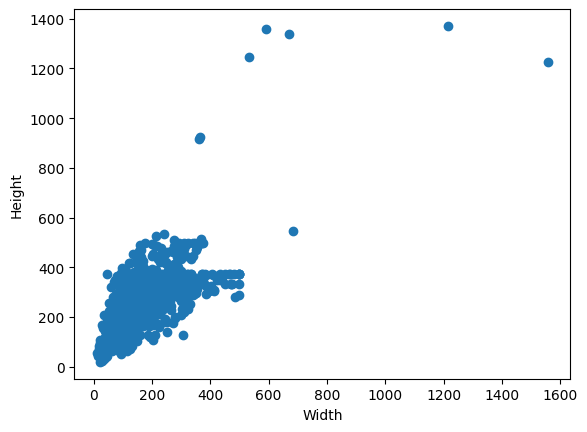

In [16]:
# plot width vs height in a scatter plot
plt.scatter([x[0] for x in dim_of_bnd_box_list], [x[1] for x in dim_of_bnd_box_list])
plt.xlabel('Width')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

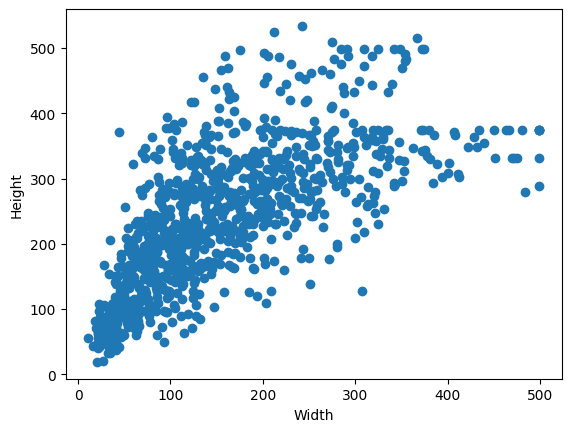

In [17]:
temp_list = []

for dim in dim_of_bnd_box_list:
    if dim[0] < 600 and dim[1] < 800:
        temp_list.append(dim)

# plot width vs height in a scatter plot
plt.scatter([x[0] for x in temp_list], [x[1] for x in temp_list])
plt.xlabel('Width')
plt.ylabel('Height')

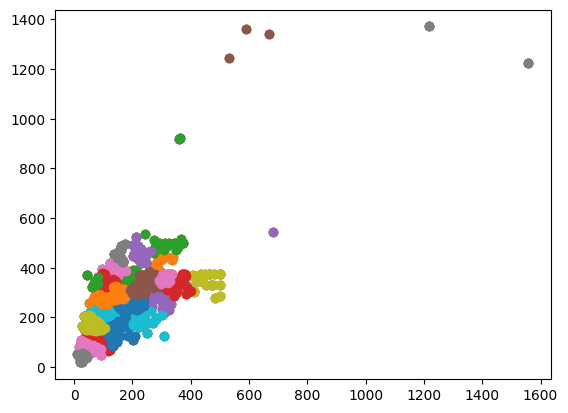

In [78]:
centroids_list = dim_of_bnd_box_list[:30]
clusters_list = []

num_of_clusters = 30

is_same = False
count = 0
while not is_same:
    clusters_list = [[] for _ in range(num_of_clusters)]

    for dim_of_bnd_box in dim_of_bnd_box_list:
        min_dist = float('inf')

        for ind, centroid in enumerate(centroids_list):
            dist = ((dim_of_bnd_box[0] - centroid[0])**2 + (dim_of_bnd_box[1] - centroid[1])**2)**(1/2)
            if dist < min_dist:
                min_dist = dist
                closest_centroid_ind = ind
                clusters_list[closest_centroid_ind].append(dim_of_bnd_box)

    new_centroids_list = []
    for cluster in clusters_list:
        if len(cluster) == 0:
            continue
        new_centroids_list.append([sum([x[0] for x in cluster]) / len(cluster), sum([x[1] for x in cluster]) / len(cluster)])

    if new_centroids_list == centroids_list:
        is_same = True
    else:
        centroids_list = new_centroids_list

# plot the clusters with different colours
for i, cluster in enumerate(clusters_list):
    plt.scatter([x[0] for x in cluster], [x[1] for x in cluster], label=f'Cluster {i+1}')

In [79]:
centroids_list

[[160.177, 244.309],
 [320.7548076923077, 404.27884615384613],
 [184.43367346938774, 341.0969387755102],
 [67.34670487106017, 121.4756446991404],
 [270.29411764705884, 275.7647058823529],
 [755.8571428571429, 1197.7142857142858],
 [136.6551724137931, 396.1896551724138],
 [1387.5, 1298.5],
 [444.0285714285714, 347.7142857142857],
 [97.42328042328042, 196.17989417989418],
 [150.83870967741936, 153.2741935483871],
 [113.31111111111112, 295.3777777777778],
 [294.42424242424244, 513.1515151515151],
 [106.54545454545455, 341.8787878787879],
 [682.0, 546.0],
 [263.0925925925926, 348.6111111111111],
 [38.08849557522124, 69.00884955752213],
 [28.6, 43.52],
 [67.8961038961039, 169.11688311688312],
 [242.0, 194.04761904761904],
 [209.44444444444446, 273.1587301587302],
 [153.09756097560975, 295.7560975609756],
 [68.42857142857143, 344.0],
 [351.94117647058823, 333.2647058823529],
 [214.6, 463.45],
 [218.13333333333333, 313.3666666666667],
 [314.5, 358.9],
 [159.63636363636363, 451.09090909090907]

In [80]:
# centroids_list has width and height, arramge them based on area
centroids_list = sorted(centroids_list, key=lambda x: x[0]*x[1], reverse=True)

In [72]:
def detect_blocks_in_image(image_path, clf, feature_extractor, centroids_list, image_dims=(160, 160)):
    # Load image
    img = cv2.imread(image_path)
    original_img = img.copy()
    height, width, _ = img.shape

    bnd_box_list = []

    anchor_points = [0, 0, 0, 0]
    anchor_size = 16
    anchor_x = 100
    anchor_y = 100

    min_confidence = 0
    for centroid in centroids_list:
        for i in range(0, anchor_size):
            for j in range(0, anchor_size):
                block_w, block_h = anchor_x*j, anchor_y*i

                y1, y2 = block_h, int(block_h + centroid[1])
                x1, x2 = block_w, int(block_w + centroid[0])
                if x2 > width or y2 > height:
                    continue
                block = img[y1:y2, x1:x2]

                # Resize block to model input size
                resized_block = cv2.resize(block, (image_dims[1], image_dims[0]))
                normalized_block = resized_block.astype("float32") / 255.0
                input_block = np.expand_dims(normalized_block, axis=0)

                # Extract features
                features = feature_extractor.predict(input_block, verbose=0)

                # Predict using SVM
                pred = clf.predict(features)[0]

                # Draw bounding box if positive class
                if pred == 1:
                    # Predict decision scores
                    decision_values = clf.decision_function(features)

                    # Convert to confidence values
                    confidence = 1.0 / (1.0 + np.exp(-decision_values))

                    if confidence[0] > 0.95:
                        min_confidence = confidence
                        anchor_points = [x1, y1, x2, y2]
                        # print("Decision Scores:", decision_values)
                        # print("Confidence Values:", confidence)
                        bnd_box_list.append(anchor_points)

    # sort bnd_box_list by 1st element in each list
    bnd_box_list = sorted(bnd_box_list, key=lambda x: x[0])
    while len(bnd_box_list) > 1:
        # union intersection metric to find most intersected area that is more that 80% of bnd_box intersected
        for i in range(len(bnd_box_list)):
            for j in range(i+1, len(bnd_box_list)):
                if bnd_box_list[i] is None:
                    break
                if bnd_box_list[j] is None:
                    continue
                x1, y1, x2, y2 = bnd_box_list[i]
                x3, y3, x4, y4 = bnd_box_list[j]
                intersection_area = max(0, min(x2, x4) - max(x1, x3)) * max(0, min(y2, y4) - max(y1, y3))
                union_area = (x2 - x1) * (y2 - y1) + (x4 - x3) * (y4 - y3) - intersection_area
                iou = intersection_area / union_area
                if intersection_area / ((x2-x1)*(y2-y1)) > 0.7:
                    bnd_box_list[i] = None
                if intersection_area / ((x4-x3)*(y4-y3)) > 0.7:
                    bnd_box_list[j] = None

                if iou > 0.8:
                    bnd_box_list.append([max(x1, x3), max(y1, y3), min(x2, x4), min(y2, y4)])
                    bnd_box_list[i] = None
                    bnd_box_list[j] = None
        print("oooooooo",len(bnd_box_list))

        def avg(pt_list):
            avg = sum(pt_list) / len(pt_list)
            squared_diff = [(x - avg)**2 for x in pt_list]
            return int(avg)

        if bnd_box_list == [box for box in bnd_box_list if box is not None]:
            if bnd_box_list:
                bnd_box_list = np.array(bnd_box_list)
                x1, y1, x2, y2 = avg(bnd_box_list[:, 0]), avg(bnd_box_list[:, 1]), avg(bnd_box_list[:, 2]), avg(bnd_box_list[:, 3])
                bnd_box_list = [[x1, y1, x2, y2]]
                print(bnd_box_list)
            break
        bnd_box_list = [box for box in bnd_box_list if box is not None]
        print(bnd_box_list)

    # save img with all bounding box
    for ind, bnd_box_list in enumerate(bnd_box_list):
        cv2.rectangle(original_img, (bnd_box_list[0], bnd_box_list[1]), (bnd_box_list[2], bnd_box_list[3]), ((ind*50)%255, 255, 255-(ind*50)%255), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


oooooooo 49
3
oooooooo 3
[66, 33, 299, 342]


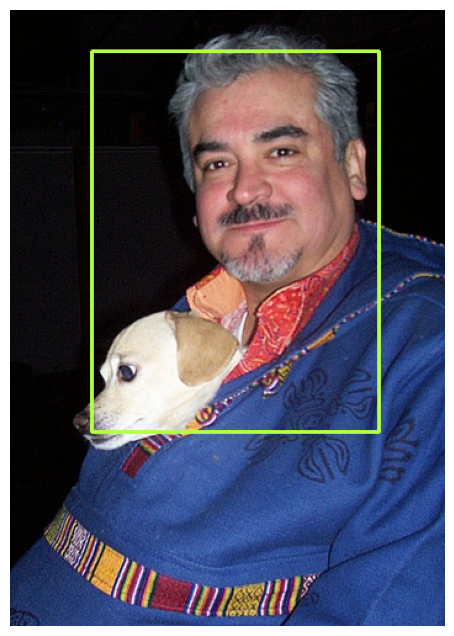

In [57]:
detect_blocks_in_image('/content/image (1).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 59
5
oooooooo 5
4
oooooooo 4
[150, 25, 407, 349]


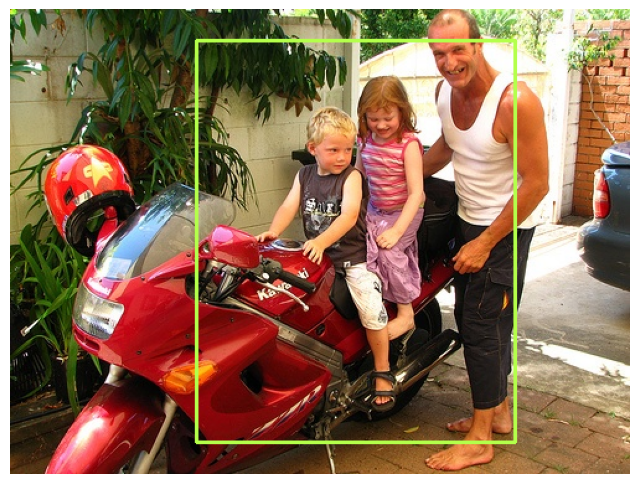

In [64]:
detect_blocks_in_image('/content/image (8).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 77
3
oooooooo 3
2
oooooooo 2
[100, 100, 313, 426]


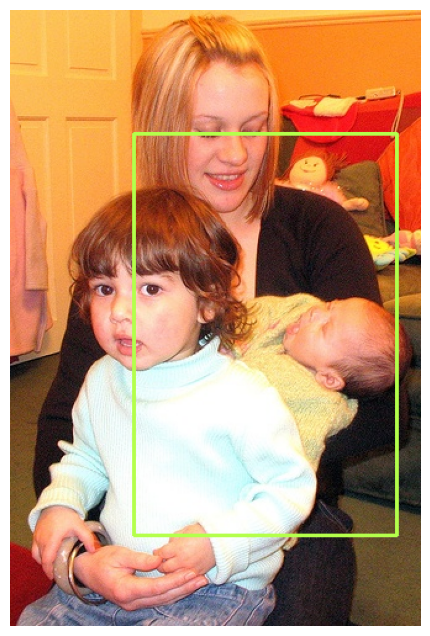

In [63]:
detect_blocks_in_image('/content/image (7).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 66
4
oooooooo 4
3
oooooooo 3
[233, 33, 460, 301]


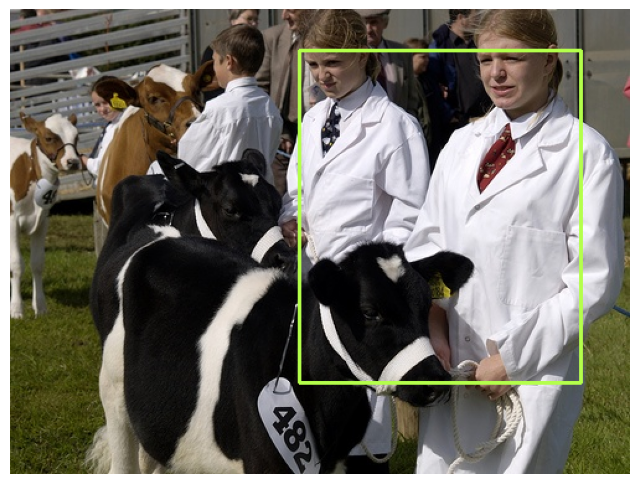

In [60]:
detect_blocks_in_image('/content/image (4).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 43
6
oooooooo 6
[166, 100, 324, 376]


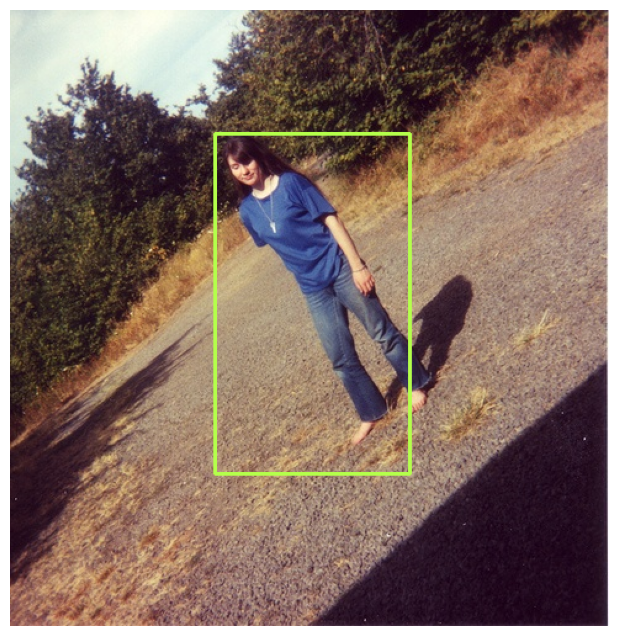

In [61]:
detect_blocks_in_image('/content/image (5).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 17
3
oooooooo 3
[166, 0, 398, 353]


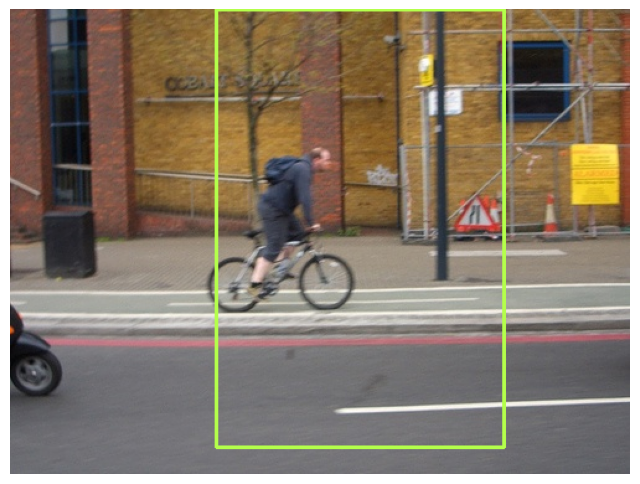

In [62]:
detect_blocks_in_image('/content/image (6).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

In [50]:
def detect_blocks_in_image(image_path, clf, feature_extractor, centroids_list, image_dims=(160, 160)):
    # Load image
    img = cv2.imread(image_path)
    original_img = img.copy()
    height, width, _ = img.shape

    bnd_box_list = []

    anchor_points = [0, 0, 0, 0]
    anchor_size = 16
    anchor_x = 100
    anchor_y = 100

    min_confidence = 0
    for centroid in centroids_list:
        for i in range(0, anchor_size):
            for j in range(0, anchor_size):
                block_w, block_h = anchor_x*j, anchor_y*i

                y1, y2 = block_h, int(block_h + centroid[1])
                x1, x2 = block_w, int(block_w + centroid[0])
                if x2 > width or y2 > height:
                    continue
                block = img[y1:y2, x1:x2]

                # Resize block to model input size
                resized_block = cv2.resize(block, (image_dims[1], image_dims[0]))
                normalized_block = resized_block.astype("float32") / 255.0
                input_block = np.expand_dims(normalized_block, axis=0)

                # Extract features
                features = feature_extractor.predict(input_block, verbose=0)

                # Predict using SVM
                pred = clf.predict(features)[0]

                # Draw bounding box if positive class
                if pred == 1:
                    # Predict decision scores
                    decision_values = clf.decision_function(features)

                    # Convert to confidence values
                    confidence = 1.0 / (1.0 + np.exp(-decision_values))

                    if confidence[0] > 0.95:
                        min_confidence = confidence
                        anchor_points = [x1, y1, x2, y2]
                        # print("Decision Scores:", decision_values)
                        # print("Confidence Values:", confidence)
                        bnd_box_list.append(anchor_points)

    # sort bnd_box_list by 1st element in each list
    bnd_box_list = sorted(bnd_box_list, key=lambda x: x[0])
    while len(bnd_box_list) > 1:
        # union intersection metric to find most intersected area that is more that 80% of bnd_box intersected
        for i in range(len(bnd_box_list)):
            for j in range(i+1, len(bnd_box_list)):
                if bnd_box_list[i] is None:
                    break
                if bnd_box_list[j] is None:
                    continue
                x1, y1, x2, y2 = bnd_box_list[i]
                x3, y3, x4, y4 = bnd_box_list[j]
                intersection_area = max(0, min(x2, x4) - max(x1, x3)) * max(0, min(y2, y4) - max(y1, y3))
                union_area = (x2 - x1) * (y2 - y1) + (x4 - x3) * (y4 - y3) - intersection_area
                iou = intersection_area / union_area
                if intersection_area / ((x2-x1)*(y2-y1)) > 0.7:
                    bnd_box_list[i] = None
                if intersection_area / ((x4-x3)*(y4-y3)) > 0.7:
                    bnd_box_list[j] = None

                if iou > 0.5:
                    bnd_box_list.append([min(x1, x3), min(y1, y3), max(x2, x4), max(y2, y4)])
                    bnd_box_list[i] = None
                    bnd_box_list[j] = None
        print("oooooooo",len(bnd_box_list))

        def avg(pt_list):
            avg = sum(pt_list) / len(pt_list)
            squared_diff = [(x - avg)**2 for x in pt_list]
            return int(avg)

        if bnd_box_list == [box for box in bnd_box_list if box is not None]:
            break
        bnd_box_list = [box for box in bnd_box_list if box is not None]
        print(len(bnd_box_list))

    # save img with all bounding box
    for ind, bnd_box_list in enumerate(bnd_box_list):
        cv2.rectangle(original_img, (bnd_box_list[0], bnd_box_list[1]), (bnd_box_list[2], bnd_box_list[3]), ((ind*50)%255, 255, 255-(ind*50)%255), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Blocks")
    plt.show()


oooooooo 49
[[0, 0, 342, 482]]


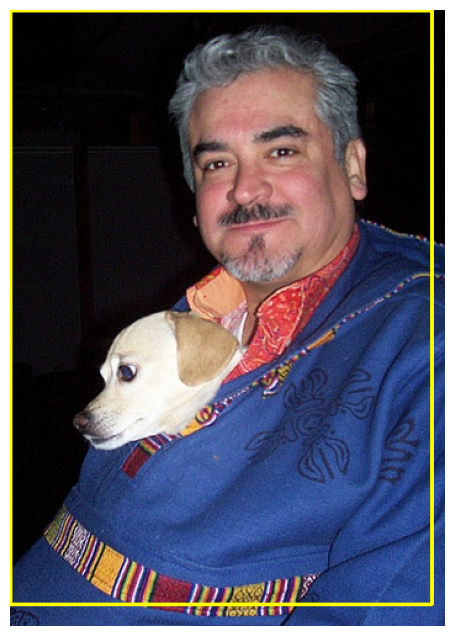

In [73]:
detect_blocks_in_image('/content/image (1).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 37
[[0, 0, 313, 289], [0, 200, 296, 404], [0, 100, 157, 478], [100, 100, 313, 480]]
oooooooo 4
[[25, 100, 269, 412]]


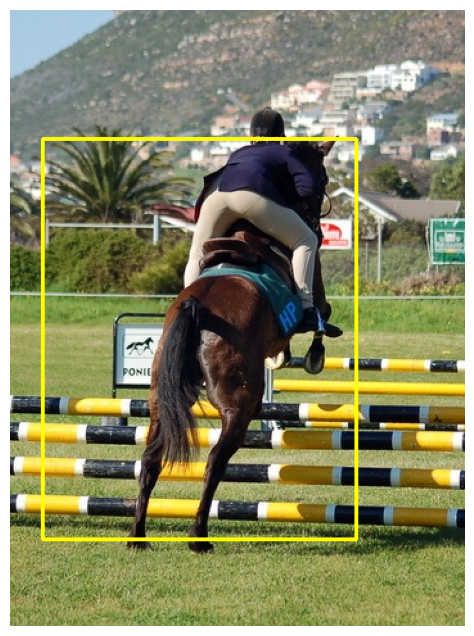

In [74]:
detect_blocks_in_image('/content/image (2).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 42
[[100, 0, 203, 282], [200, 0, 444, 176], [200, 0, 303, 282], [300, 0, 455, 237], [400, 100, 466, 267]]
oooooooo 5
[[240, 20, 374, 248]]


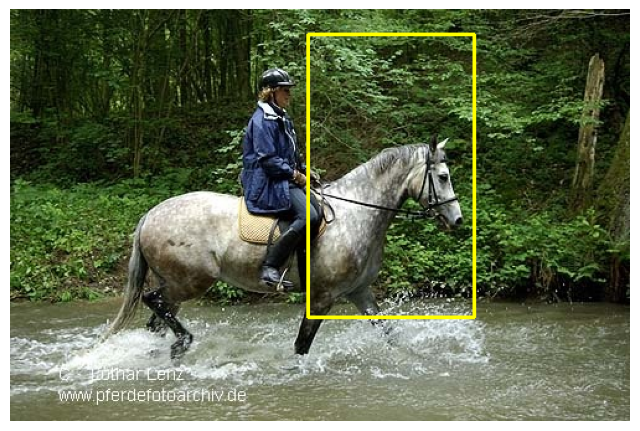

In [75]:
detect_blocks_in_image('/content/image (3).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 77
[[400, 0, 499, 343], [0, 0, 418, 338], [200, 0, 464, 322]]
oooooooo 3
[[400, 0, 499, 343], [0, 0, 418, 338]]
oooooooo 2
[[200, 0, 458, 340]]


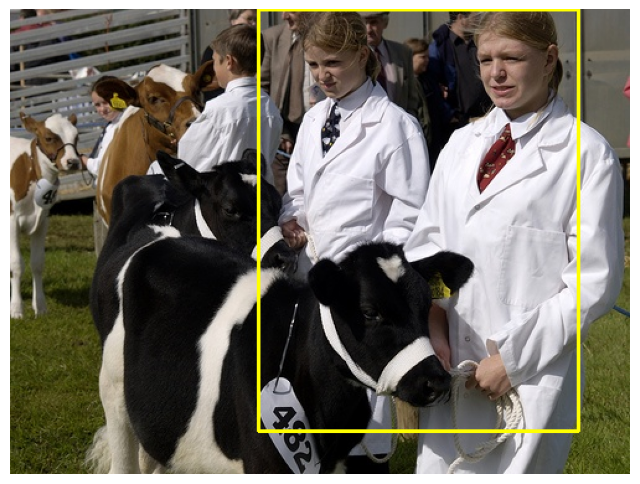

In [76]:
detect_blocks_in_image('/content/image (4).jpg', clf, base_model, centroids_list, image_dims=(160, 160))

oooooooo 48
[[100, 0, 442, 482]]


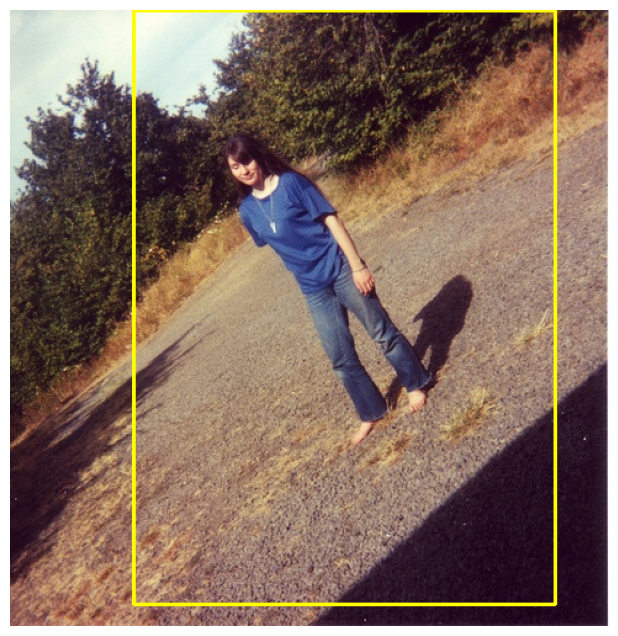

In [77]:
detect_blocks_in_image('/content/image (5).jpg', clf, base_model, centroids_list, image_dims=(160, 160))